In [1]:
import os
import pandas as pd
from shutil import copy
from importlib import reload
import classif_output_structs as cos
cos = reload(cos)

import warnings
warnings.filterwarnings('ignore')

In [15]:
def combo_dupes(collection, dupes_to_count:list, group_dupes=False):

    nested_best_epochs = [series.best_epochs for series in collection.collection]
    all_best_epochs = [j for i in nested_best_epochs for j in i]
    combo = cos.ComboEpoch( all_best_epochs )
    
    if group_dupes:
        dupes_to_count = [dupes_to_count]
    dupe_dict = {}
    for dupe_count in dupes_to_count:
        df = combo.pairwise_df(skip_correct=True,
                         skip_empties=True,
                         keep_dupes=dupe_count)
        img_dict = df.images.to_dict()
        if img_dict: # if it's not empty
            if group_dupes:
                dupe_count = '-'.join(['{:02}'.format(x) for x in dupe_count])
            else: dupe_count = '{:02}'.format(dupe_count)
            dupe_dict[dupe_count] = img_dict
    
    return dupe_dict


def transcribe_dupes(dupe_dict, name, root='naughty_export',
                     target_dir_format='{} ... {}', dry_run=False):

    for dupe_num in dupe_dict:
        print();print(80*'=')
        print(name, 'dupes:', dupe_num,'\n')
        for ikey,okey in dupe_dict[dupe_num]:
            dupe_dir = '{}_dupes'.format(dupe_num)
            target_dir = target_dir_format.format(ikey,okey)
            target_dir = os.path.join(root,name,dupe_dir,target_dir)
            if not dry_run: os.makedirs(target_dir, exist_ok=True)
            ipaths = dupe_dict[dupe_num][(ikey,okey)]
            #fnames = [os.path.basename(path) for path in ipaths]
            #opaths = [os.path.join(root,target_dir,fname) for fname in fnames]
            for src in ipaths:
                if dry_run: print(src, '\n\tEXPORT-TO', target_dir)
                else: copy(src, target_dir)
        

/home/sbatchelder/.conda/envs/dataproc/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sbatchelder/.conda/envs/dataproc/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


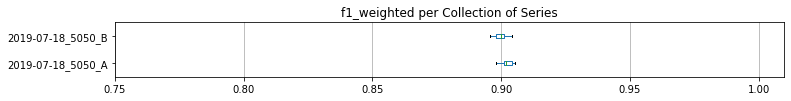

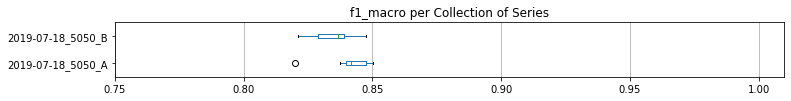

In [3]:
    
coll = cos.Collection(['2019-07-18_5050_A',
                       '2019-07-18_5050_B'],
                      best_epochs_only=True)

coll.boxplot('f1_weighted', start=0.75)
coll.boxplot('f1_macro', start=0.75)

In [13]:

cd = combo_dupes(coll,[10,9,8], group_dupes=True)
#cd[10][('Amphidinium','Dinophyceae')]
cd.keys()

dict_keys(['10-09-08'])

In [17]:

transcribe_dupes(cd, name='July18_dataset')



July18_dataset dupes: 10-09-08 

